In [287]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import pickle as pkl
from multihist import Histdd
import flamedisx as fd
import os

In [288]:
pdfs = [dict(), dict()]

## ROI for templates

In [289]:
xlzd_source = fd.xlzd.XLZDERSource(configuration='60t')
cS1_min = xlzd_source.cS1_min
cS1_max = xlzd_source.cS1_max
log10_cS2_min = xlzd_source.log10_cS2_min
log10_cS2_max = xlzd_source.log10_cS2_max

/Users/amirr/Desktop/Flame/flamedisx/flamedisx/source.py:271: UserWarning: Defaults for unused settings ignored: {'configuration': '60t'}
  warnings.warn(f"Defaults for unused settings ignored: {unused}")


## Background sources

In [290]:
SolarER = fd.xlzd.XLZDvERSource(configuration='60t',
                                drift_field_V_cm=20., gas_field_kV_cm=7.5,
                                elife_ns=10000e3, g1=0.27)

/Users/amirr/Desktop/Flame/flamedisx/flamedisx/source.py:271: UserWarning: Defaults for unused settings ignored: {'configuration': '60t'}
  warnings.warn(f"Defaults for unused settings ignored: {unused}")


SolarER_mu 7.567595830932617


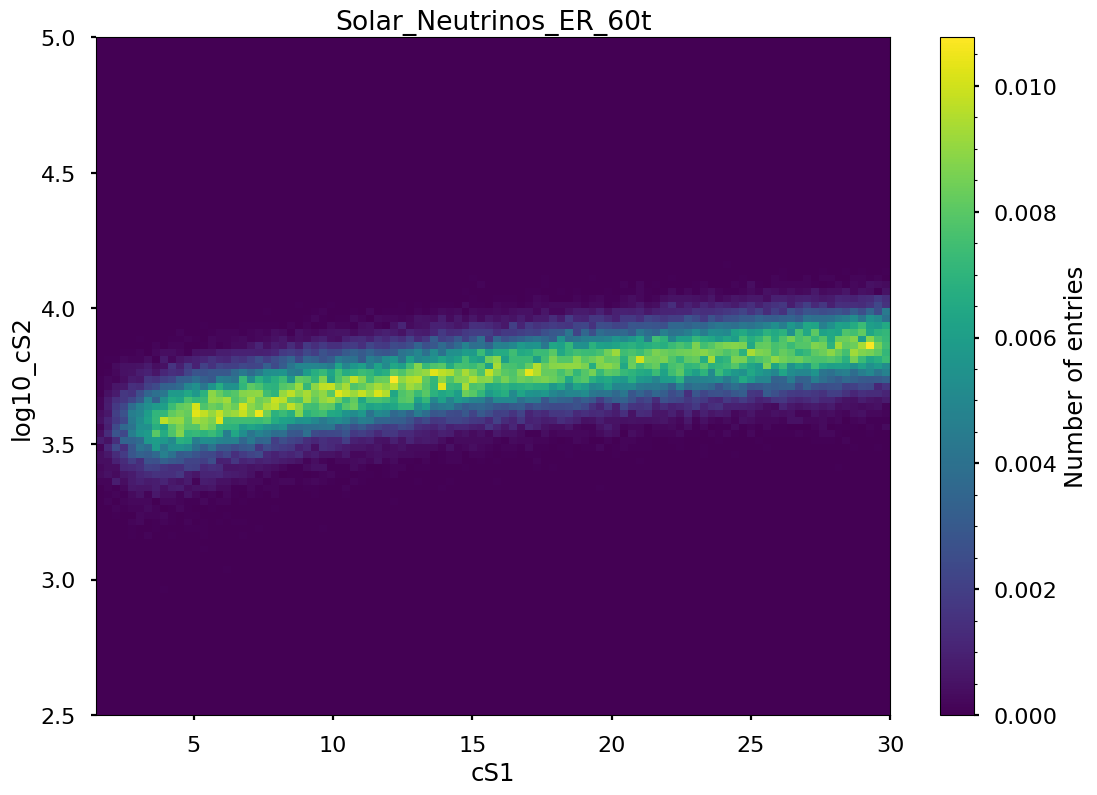

In [291]:
SolarER_hist = Histdd(bins=100, range=[[cS1_min, cS1_max], [log10_cS2_min, log10_cS2_max]], axis_names=['cS1', 'log10_cS2'])

SolarER_data = SolarER.simulate(int(1e6)) 


SolarER_hist.add(SolarER_data['cs1'], np.log10(SolarER_data['cs2']))

SolarER_mu = SolarER.estimate_mu(n_trials=int(1e6))
"""
Seems like this SolarER_mu (_mu obj in for every source is driving the "counts" per ty, whenever we do bg.hist.n, the final number which pops up is scaled with respect to this factor and later used to calculte the bg counts in the likelihood step)
Infact once the bg counts are calc here, they are used downstream in inference routine...so turns out everything (rates wise) falls onto this .estimate_mu method.
Gotta Understand how this works as we don't have this for AC....
"""
print("SolarER_mu",SolarER_mu)
SolarER_hist.histogram = SolarER_hist.histogram / SolarER_hist.n * SolarER_mu 


SolarER_hist.plot()
plt.title("Solar_Neutrinos_ER_60t")

pdfs[0]['SolarER'] = SolarER_hist


In [309]:
print(SolarER_data.columns)
SolarER_data

Index(['r', 'theta', 'z', 'x', 'y', 'drift_time', 'event_time', 'energy',
       's1_pos_corr', 'p_accepted', 'ions_produced', 'electrons_produced',
       'photons_produced', 'photons_detected', 's1_photoelectrons_produced',
       's1_photoelectrons_detected', 's1', 'cs1', 'electrons_detected',
       's2_photons_produced', 's2_photons_detected',
       's2_photoelectrons_detected', 's2', 'cs2', 'ces_er_equivalent'],
      dtype='object')


,r,theta,z,x,y,drift_time,event_time,energy,s1_pos_corr,p_accepted,...,s1_photoelectrons_detected,s1,cs1,electrons_detected,s2_photons_produced,s2_photons_detected,s2_photoelectrons_detected,s2,cs2,ces_er_equivalent
8,136.961487,0.125413,-222.141529,135.885807,17.131733,4.011062e+06,1.597499e+18,2.3,1.022313,1.000000,...,20,16.459529,16.100286,38,25766,2525,3036,3048.571877,4552.968476,2.457276
34,85.447098,0.341215,-234.174575,80.520967,28.593364,4.228335e+06,1.592861e+18,2.9,1.037481,1.000000,...,20,19.572197,18.865110,53,35570,3512,4228,4218.283043,6438.281420,3.145111
51,133.397706,3.959628,-197.943865,-91.198184,-97.354194,3.574141e+06,1.585861e+18,2.0,0.995741,1.000000,...,7,7.721845,7.754871,46,30476,3069,3646,3633.669933,5194.795267,1.906811
52,75.294339,1.087979,-26.721935,34.957353,66.687487,4.825002e+05,1.594149e+18,2.9,0.993594,0.999439,...,6,6.678379,6.721434,78,52667,5356,6398,6410.691682,6727.591426,2.188799
60,142.147975,5.618038,-232.669380,111.845716,-87.730169,4.201156e+06,1.573535e+18,3.1,1.035521,1.000000,...,19,20.135690,19.444987,51,34398,3443,4131,4100.168290,6241.020122,3.146578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999928,50.450134,3.566760,-67.476456,-45.958538,-20.809344,1.218378e+06,1.577989e+18,1.4,0.966714,0.887430,...,4,3.820503,3.952051,43,28996,2897,3475,3440.353835,3886.123285,1.270208
999957,67.208403,2.207348,-105.862288,-39.950399,54.045676,1.911485e+06,1.584653e+18,2.9,0.954799,1.000000,...,14,14.340757,15.019655,57,38502,3991,4765,4706.453612,5697.817294,2.641807
999970,138.631862,0.484173,-277.180049,122.697548,64.529876,5.004856e+06,1.589359e+18,5.1,1.099147,1.000000,...,31,26.071086,23.719382,58,38864,3947,4706,4680.703017,7720.922888,3.864280
999989,139.116024,2.042203,-184.325509,-63.178162,123.942681,3.328243e+06,1.589486e+18,3.5,0.983417,1.000000,...,20,19.952198,20.288637,61,40823,4064,4859,4867.696633,6789.960817,3.350117


In [310]:
a=13.7*(16.1/0.27 + 4553/44)
a

2234.564562289562

In [292]:
Xe136 = fd.xlzd.XLZDXe136Source(configuration='60t',
                                drift_field_V_cm=20., gas_field_kV_cm=7.5,
                                elife_ns=10000e3, g1=0.27)

/Users/amirr/Desktop/Flame/flamedisx/flamedisx/source.py:271: UserWarning: Defaults for unused settings ignored: {'configuration': '60t'}
  warnings.warn(f"Defaults for unused settings ignored: {unused}")


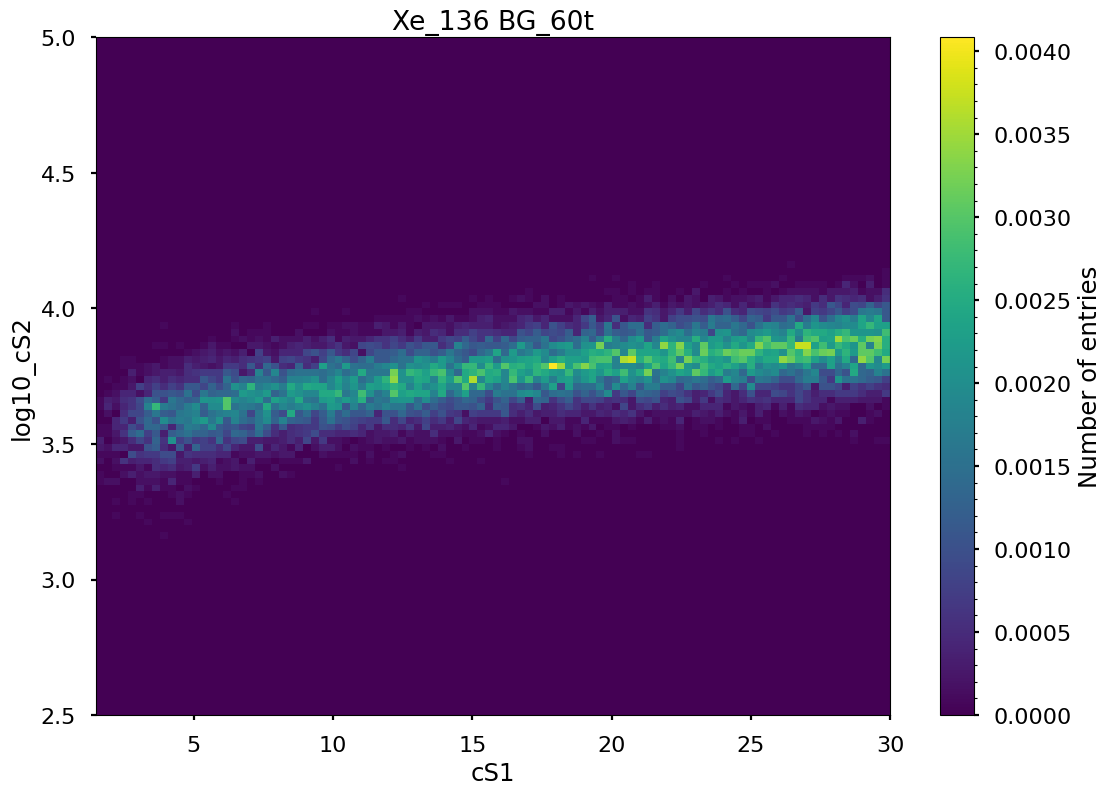

In [293]:
Xe136_hist = Histdd(bins=100, range=[[cS1_min, cS1_max], [log10_cS2_min, log10_cS2_max]], axis_names=['cS1', 'log10_cS2'])

Xe136_data = Xe136.simulate(int(1e6))

Xe136_hist.add(Xe136_data['cs1'], np.log10(Xe136_data['cs2']))

Xe136_mu = Xe136.estimate_mu(n_trials=int(1e6))
Xe136_hist.histogram = Xe136_hist.histogram / Xe136_hist.n * Xe136_mu


Xe136_hist.plot()
plt.title("Xe_136 BG_60t")

pdfs[0]['Xe136'] = Xe136_hist


In [ ]:
print(np.linspace(cS1_min, cS1_max,101))
print(np.linspace(log10_cS2_min, log10_cS2_max,101))
print(cS1_min,)

In [294]:
Pb214 = fd.xlzd.XLZDPb214Source(configuration='60t',
                                drift_field_V_cm=20., gas_field_kV_cm=7.5,
                                elife_ns=10000e3, g1=0.27)

/Users/amirr/Desktop/Flame/flamedisx/flamedisx/source.py:271: UserWarning: Defaults for unused settings ignored: {'configuration': '60t'}
  warnings.warn(f"Defaults for unused settings ignored: {unused}")


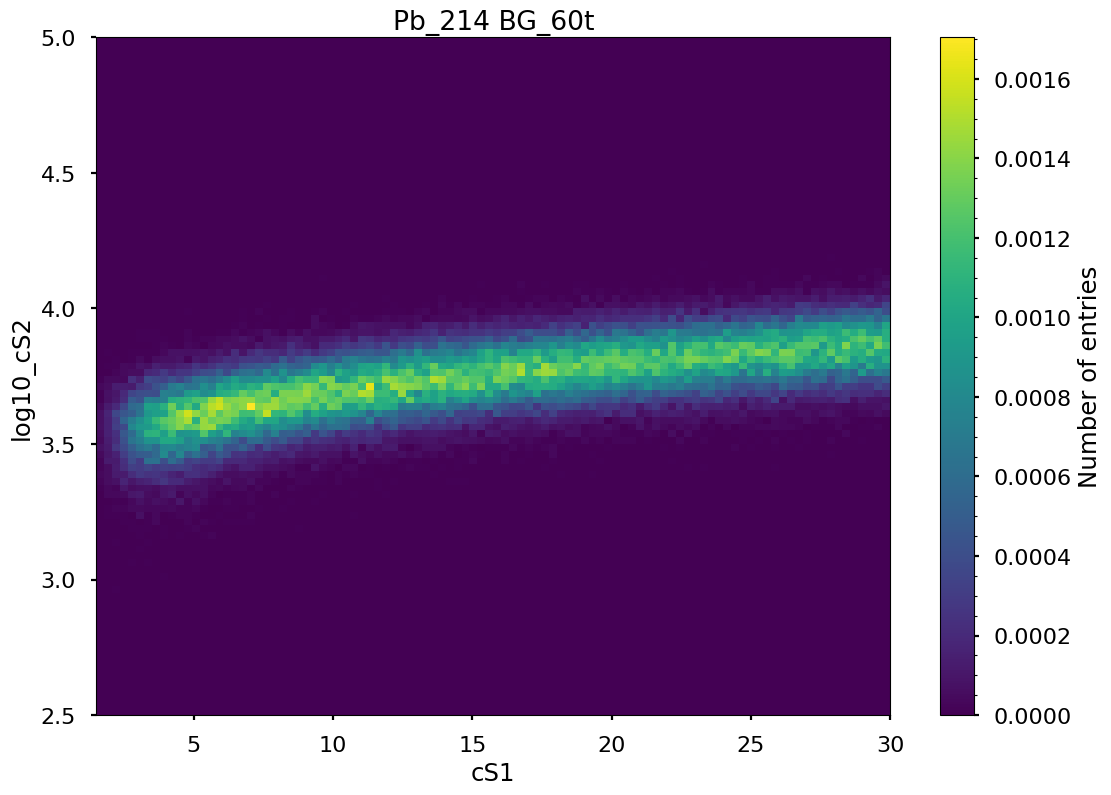

In [295]:
Pb214_hist = Histdd(bins=100, range=[[cS1_min, cS1_max], [log10_cS2_min, log10_cS2_max]], axis_names=['cS1', 'log10_cS2'])

Pb214_data = Pb214.simulate(int(1e6))

Pb214_hist.add(Pb214_data['cs1'], np.log10(Pb214_data['cs2']))

Pb214_mu = Pb214.estimate_mu(n_trials=int(1e6))
Pb214_hist.histogram = Pb214_hist.histogram / Pb214_hist.n * Pb214_mu
plt.title("Pb_214 BG_60t")
Pb214_hist.plot()

pdfs[0]['Pb214'] = Pb214_hist

In [296]:
Kr85 = fd.xlzd.XLZDKr85Source(configuration='60t',
                               drift_field_V_cm=20., gas_field_kV_cm=7.5,
                               elife_ns=10000e3, g1=0.27)

/Users/amirr/Desktop/Flame/flamedisx/flamedisx/source.py:271: UserWarning: Defaults for unused settings ignored: {'configuration': '60t'}
  warnings.warn(f"Defaults for unused settings ignored: {unused}")


befire 99139.0
after 4.650977202129364


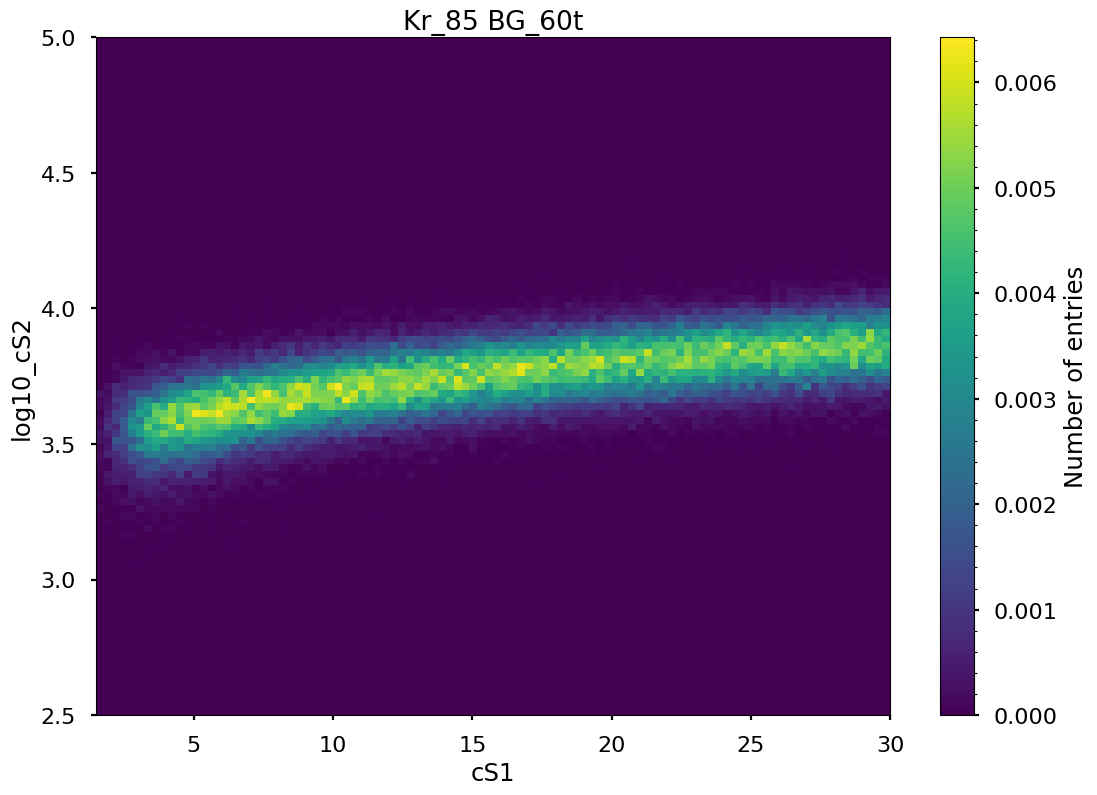

In [297]:
Kr85_hist = Histdd(bins=100, range=[[cS1_min, cS1_max], [log10_cS2_min, log10_cS2_max]], axis_names=['cS1', 'log10_cS2'])

Kr85_data = Kr85.simulate(int(1e6))

Kr85_hist.add(Kr85_data['cs1'], np.log10(Kr85_data['cs2']))

Kr85_mu = Kr85.estimate_mu(n_trials=int(1e6))
print("befire",Kr85_hist.n)
Kr85_hist.histogram = Kr85_hist.histogram / Kr85_hist.n * Kr85_mu
print("after",Kr85_hist.n)
plt.title("Kr_85 BG_60t")
Kr85_hist.plot()

pdfs[0]['Kr85'] = Kr85_hist

In [298]:
CEvNS_solar = fd.xlzd.XLZDvNRSolarSource(configuration='60t',
                                         drift_field_V_cm=20., gas_field_kV_cm=7.5,
                                         elife_ns=10000e3, g1=0.27)

/Users/amirr/Desktop/Flame/flamedisx/flamedisx/source.py:271: UserWarning: Defaults for unused settings ignored: {'configuration': '60t'}
  warnings.warn(f"Defaults for unused settings ignored: {unused}")


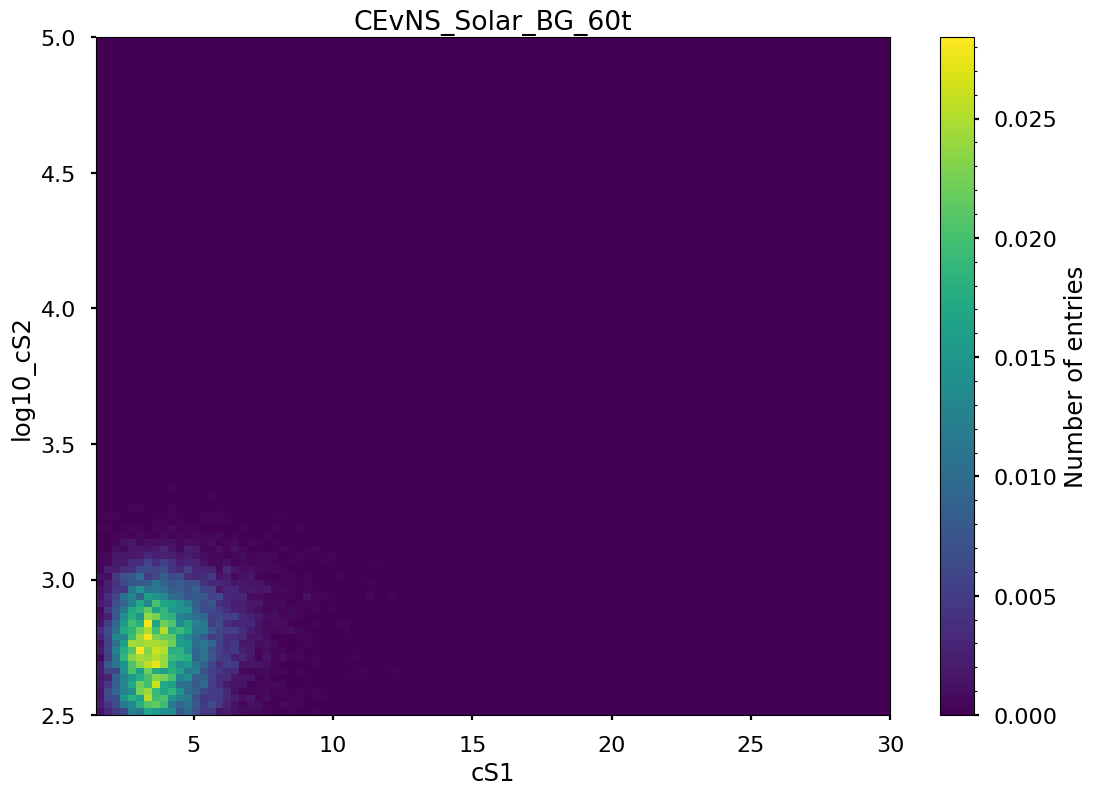

In [299]:
CEvNS_solar_hist = Histdd(bins=100, range=[[cS1_min, cS1_max], [log10_cS2_min, log10_cS2_max]], axis_names=['cS1', 'log10_cS2'])

CEvNS_solar_data = CEvNS_solar.simulate(int(1e6))

CEvNS_solar_hist.add(CEvNS_solar_data['cs1'], np.log10(CEvNS_solar_data['cs2']))

CEvNS_solar_mu = CEvNS_solar.estimate_mu(n_trials=int(1e6))
CEvNS_solar_hist.histogram = CEvNS_solar_hist.histogram / CEvNS_solar_hist.n * CEvNS_solar_mu

CEvNS_solar_hist.plot()
plt.title("CEvNS_Solar_BG_60t")

pdfs[0]['CEvNS_solar'] = CEvNS_solar_hist

In [300]:
CEvNS_other = fd.xlzd.XLZDvNROtherSource(configuration='60t',
                                         drift_field_V_cm=20., gas_field_kV_cm=7.5,
                                         elife_ns=10000e3, g1=0.27)


/Users/amirr/Desktop/Flame/flamedisx/flamedisx/source.py:271: UserWarning: Defaults for unused settings ignored: {'configuration': '60t'}
  warnings.warn(f"Defaults for unused settings ignored: {unused}")


CEvNS_other_mu  0.03466383049736917
before normalisation counts 488326.0
After normalisation counts,before scaling 0.9999999999999999
after scaling 0.03466383049736918


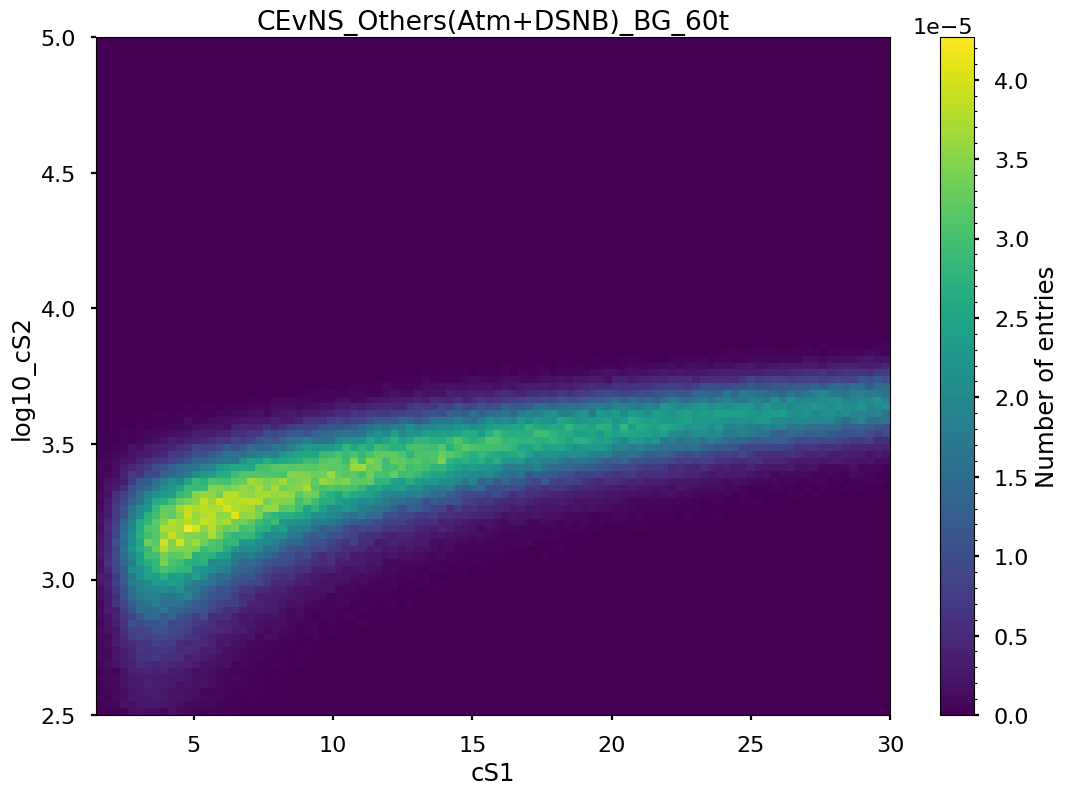

In [301]:
CEvNS_other_hist = Histdd(bins=100, range=[[cS1_min, cS1_max], [log10_cS2_min, log10_cS2_max]], axis_names=['cS1', 'log10_cS2'])
CEvNS_other_data = CEvNS_other.simulate(int(1e6))
CEvNS_other_hist.add(CEvNS_other_data['cs1'], np.log10(CEvNS_other_data['cs2']))
CEvNS_other_mu = CEvNS_other.estimate_mu(n_trials=int(1e6))
print("CEvNS_other_mu ",CEvNS_other_mu )

print("before normalisation counts", CEvNS_other_hist.n)

CEvNS_other_hist.histogram = CEvNS_other_hist.histogram / CEvNS_other_hist.n
print("After normalisation counts,before scaling", CEvNS_other_hist.n)

CEvNS_other_hist.histogram = CEvNS_other_hist.histogram / CEvNS_other_hist.n * CEvNS_other_mu
print("after scaling",CEvNS_other_hist.n)
CEvNS_other_hist.plot()
plt.title("CEvNS_Others(Atm+DSNB)_BG_60t")


pdfs[0]['CEvNS_other'] = CEvNS_other_hist


In [84]:
print("before normalisation counts", CEvNS_other_hist.n)
print((np.argmax(CEvNS_other_hist.histogram)))
indices = np.unravel_index(np.argmax(CEvNS_other_hist.histogram), CEvNS_other_hist.histogram.shape)
print(indices)
print(CEvNS_other_hist[13][31])


before normalisation counts 0.0342320085285455
1432
(14, 32)
4.3446049558529525e-05


In [ ]:
CEvNS_other_hist.histogram = CEvNS_other_hist.histogram / CEvNS_other_hist.n
print(np.shape(CEvNS_other_hist.histogram))
CEvNS_other_hist.histogram = CEvNS_other_hist.histogram / CEvNS_other_hist.n * CEvNS_other_mu
print("after",CEvNS_other_hist.n)
CEvNS_other_hist.plot()
plt.title("CEvNS_Others(Atm+DSNB)_BG_60t")

# Importing AC template

In [17]:
import h5py

file_path ="/Users/amirr/Desktop/AC_backgrounds_pdfs-updates-v1 2/XLZD_base_binf_n4tw200_200Vcm_v0.1.0/AC_XLZDTemplate_3fold.hdf"


with h5py.File(file_path, 'r') as hdf:

    print("Keys in the HDF file:", list(hdf.keys()))
    
    bins_data = hdf.get('bins')
    bins_data=np.array(bins_data)
    print("'bins' shape:", bins_data.shape)
    print(bins_data)
    

    templates_data = hdf.get('templates')
    templates_data=np.array(templates_data)
    print("'templates' shape:", templates_data.shape)
    print(templates_data)
# Will run this after confirming the params 

import inference_interface
import matplotlib as mpl

AC_temp=inference_interface.template_to_multihist(file_path)['hmc']



Keys in the HDF file: ['bins', 'templates']
'bins' shape: (2,)
['0' '1']
'templates' shape: (1,)
['hmc']


# Normalising And Scaling the AC template

0.9999999999999999


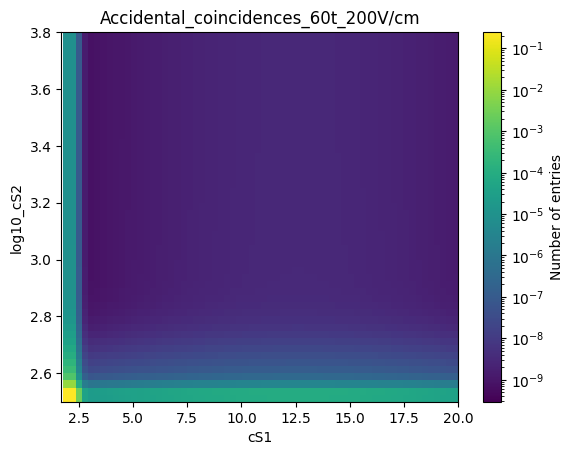

In [18]:
#print(AC_temp.bin_edges) # Verified the binning, it's correct.
AC_temp.histogram = AC_temp.histogram / AC_temp.n #*SolarER_mu # how to scale this ? 
AC_temp.plot(norm=mpl.colors.LogNorm())
plt.title("Accidental_coincidences_60t_200V/cm")
plt.xlim(1.7,20) 
plt.ylim(2.5,3.80)
print(AC_temp.n)

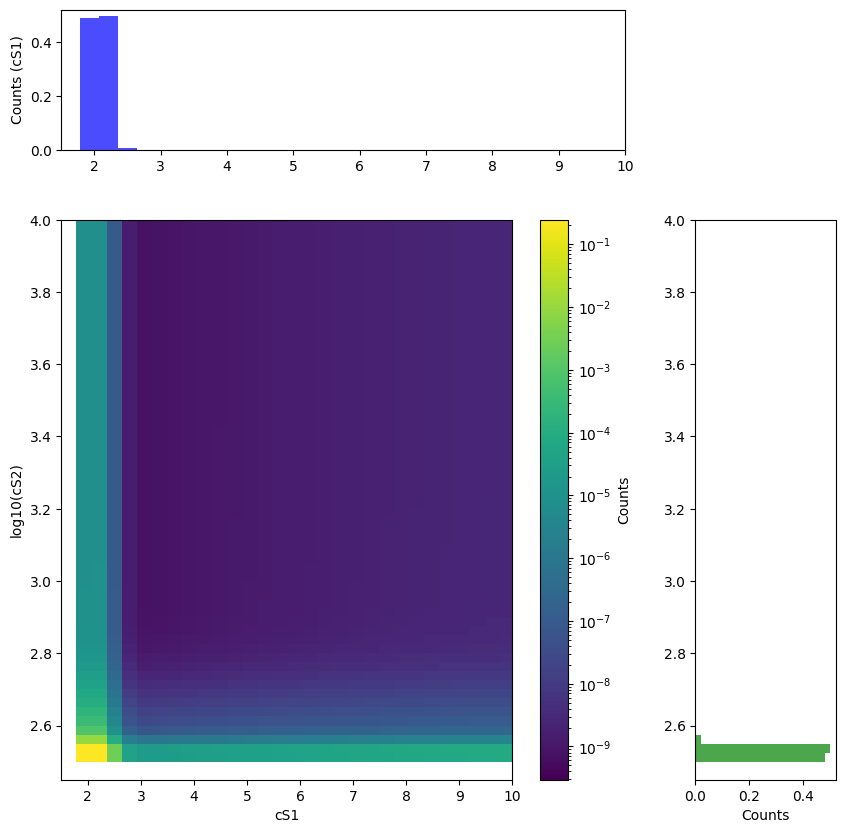

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

# Assume AC_temp is already defined
bin_edges_cS1 = AC_temp.bin_edges[0]  # Bin edges for 'cS1'
bin_edges_cS2 = AC_temp.bin_edges[1]  # Bin edges for 'log10_cS2'

# Calculate bin centers
bin_centers_cS1 = (bin_edges_cS1[:-1] + bin_edges_cS1[1:]) / 2
bin_centers_cS2 = (bin_edges_cS2[:-1] + bin_edges_cS2[1:]) / 2

# Get histogram counts
counts_cS1 = AC_temp.histogram.sum(axis=1)  # Sum over 'log10_cS2'
counts_cS2 = AC_temp.histogram.sum(axis=0)  # Sum over 'cS1'

# Main 2D histogram (joint distribution)
main_histogram = AC_temp.histogram.T  # Transpose for proper alignment

# Create a figure with gridspec layout
fig = plt.figure(figsize=(10, 10))
gs = fig.add_gridspec(4, 4, wspace=.5, hspace=.5)

# Main plot (joint distribution)
ax_main = fig.add_subplot(gs[1:, :-1])
pcm = ax_main.pcolormesh(bin_edges_cS1, bin_edges_cS2, main_histogram,cmap='viridis',norm=mcolors.LogNorm())
ax_main.set_xlabel('cS1')
ax_main.set_ylabel('log10(cS2)')
fig.colorbar(pcm, ax=ax_main, label='Counts')
ax_main.set_xlim(1.5,10)
ax_main.set_ylim(2.45,4)

# Top histogram (cS1)
ax_top = fig.add_subplot(gs[0, :-1], sharex=ax_main)
ax_top.bar(bin_centers_cS1, counts_cS1, width=np.diff(bin_edges_cS1), align='center', color='blue', alpha=0.7)
ax_top.set_ylabel('Counts (cS1)')
ax_top.tick_params(axis='x', labelbottom=True)

# Right histogram (cS2)
ax_right = fig.add_subplot(gs[1:, -1], sharey=ax_main)
ax_right.barh(bin_centers_cS2, counts_cS2, height=np.diff(bin_edges_cS2), align='center', color='green', alpha=0.7)
ax_right.set_xlabel('Counts')
ax_right.tick_params(axis='y', labelleft=True)
# Show the plot
plt.show()


# Saving AC template into PDFs

In [20]:
pdfs[0]['AC_temp'] = AC_temp

# Script for contours And Band Overlap

Calculating Percentiles

In [302]:
def percentile_to_level(array, percentile):
    array = np.sort(np.ravel(array))[::-1]
    norm = np.sum(array)
    percentiles = np.cumsum(array) / norm * 100
    levels = array    
    return np.interp(percentile, percentiles, levels)

Function to make the contours

In [303]:
def plot_hist_1(hist, color='k', label="label", **kwargs):
    contour_handles = []
    xx, yy = np.meshgrid(*hist.bin_centers())
    zz = np.array(hist.histogram).T
    for percentile, ls in zip([68, 95], ['solid', 'dashed']):  # Confidence levels
        level = percentile_to_level(zz, percentile)
        c = plt.contour(xx, yy, zz, levels=[level], colors=[color], linestyles=[ls], **kwargs)
        # Append custom legend handles for contours
        contour_handles.append(plt.Line2D([], [], color=color, linestyle=ls, label=f"{label} ({percentile} percentile contour)"))
    return contour_handles

Function to quantify the band overlap

In [304]:
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, Point
from shapely.ops import unary_union

# Main steps for overlap quantification
def quantify_overlap(ER_hist, NR_hist):
    # Generate grid and histograms for ER and NR
    xx_er, yy_er = np.meshgrid(*ER_hist.bin_centers())
    zz_er = np.array(ER_hist.histogram).T

    xx_nr, yy_nr = np.meshgrid(*NR_hist.bin_centers())
    zz_nr = np.array(NR_hist.histogram).T

    # Calculate 95th percentile contours
    er_95_level = percentile_to_level(zz_er, 95)
    nr_95_level = percentile_to_level(zz_nr, 95)

    # Get contour polygons
    er_contour = plt.contour(xx_er, yy_er, zz_er, levels=[er_95_level])
    nr_contour = plt.contour(xx_nr, yy_nr, zz_nr, levels=[nr_95_level])

    def contour_to_polygon(contour):
        """Convert matplotlib contour to shapely Polygon."""
        paths = contour.collections[0].get_paths()
        polygons = []
        for path in paths:
            v = path.vertices
            polygons.append(Polygon(v))
        return unary_union(polygons)  # Combine into a single polygon if multiple

    er_polygon = contour_to_polygon(er_contour)
    nr_polygon = contour_to_polygon(nr_contour)
    
    #er_polygon = er_polygon.simplify(0.5)  # Adjust tolerance as needed
    #nr_polygon = nr_polygon.simplify(0.5)


    # Find overlap region
    # Validate and fix polygons
    if not er_polygon.is_valid:
        print("Fixing ER Polygon...")
        er_polygon = er_polygon.buffer(0)

    if not nr_polygon.is_valid:
        print("Fixing NR Polygon...")
        nr_polygon = nr_polygon.buffer(0)

    # Simplify polygons 
    er_polygon = er_polygon.simplify(0.01, preserve_topology=True)
    nr_polygon = nr_polygon.simplify(0.01, preserve_topology=True)

    # Attempt intersection
    try:
        if er_polygon.is_valid and nr_polygon.is_valid:
            overlap_region = er_polygon.intersection(nr_polygon)
            if overlap_region.is_empty:
                print("No overlap region found.")
        else:
            print("Skipping intersection due to invalid geometries.")
            overlap_region = None
    except Exception as e:
        print(f"Error during intersection: {e}")
        overlap_region = None

    #overlap_region = er_polygon.intersection(nr_polygon)
    #overlap_region = nr_polygon.intersection(er_polygon)
    # Count events in the overlap region
    er_events = np.column_stack((xx_er.ravel(), yy_er.ravel()))
    er_events_in_overlap = sum(overlap_region.contains(Point(x, y)) for x, y in er_events)

    nr_events = np.column_stack((xx_nr.ravel(), yy_nr.ravel()))
    nr_events_in_overlap = sum(overlap_region.contains(Point(x, y)) for x, y in nr_events)

    # Calculate ER leakage percentage
    total_er_events = len(er_events)
    er_leakage = er_events_in_overlap / total_er_events * 100

    print(f"ER Leakage: {er_leakage:.2f}%")
    
    total_nr_events = len(nr_events)
    nr_leakage = nr_events_in_overlap / total_nr_events * 100

    print(f"NR Leakage: {nr_leakage:.2f}%")
    return overlap_region, nr_leakage



In [305]:
Solar_ER = pdfs[0]["SolarER"]
Xe_136 = pdfs[0]["Xe136"]
Pb_214 = pdfs[0]["Pb214"]
Kr_85 = pdfs[0]["Kr85"]
CEvNS_solar = pdfs[0]["CEvNS_solar"]
CEvNS_other = pdfs[0]["CEvNS_other"]

#plt.show(Solar_ER.plot())
ER_hist = Solar_ER + Xe_136 + Pb_214 + Kr_85  
NR_hist =  CEvNS_other

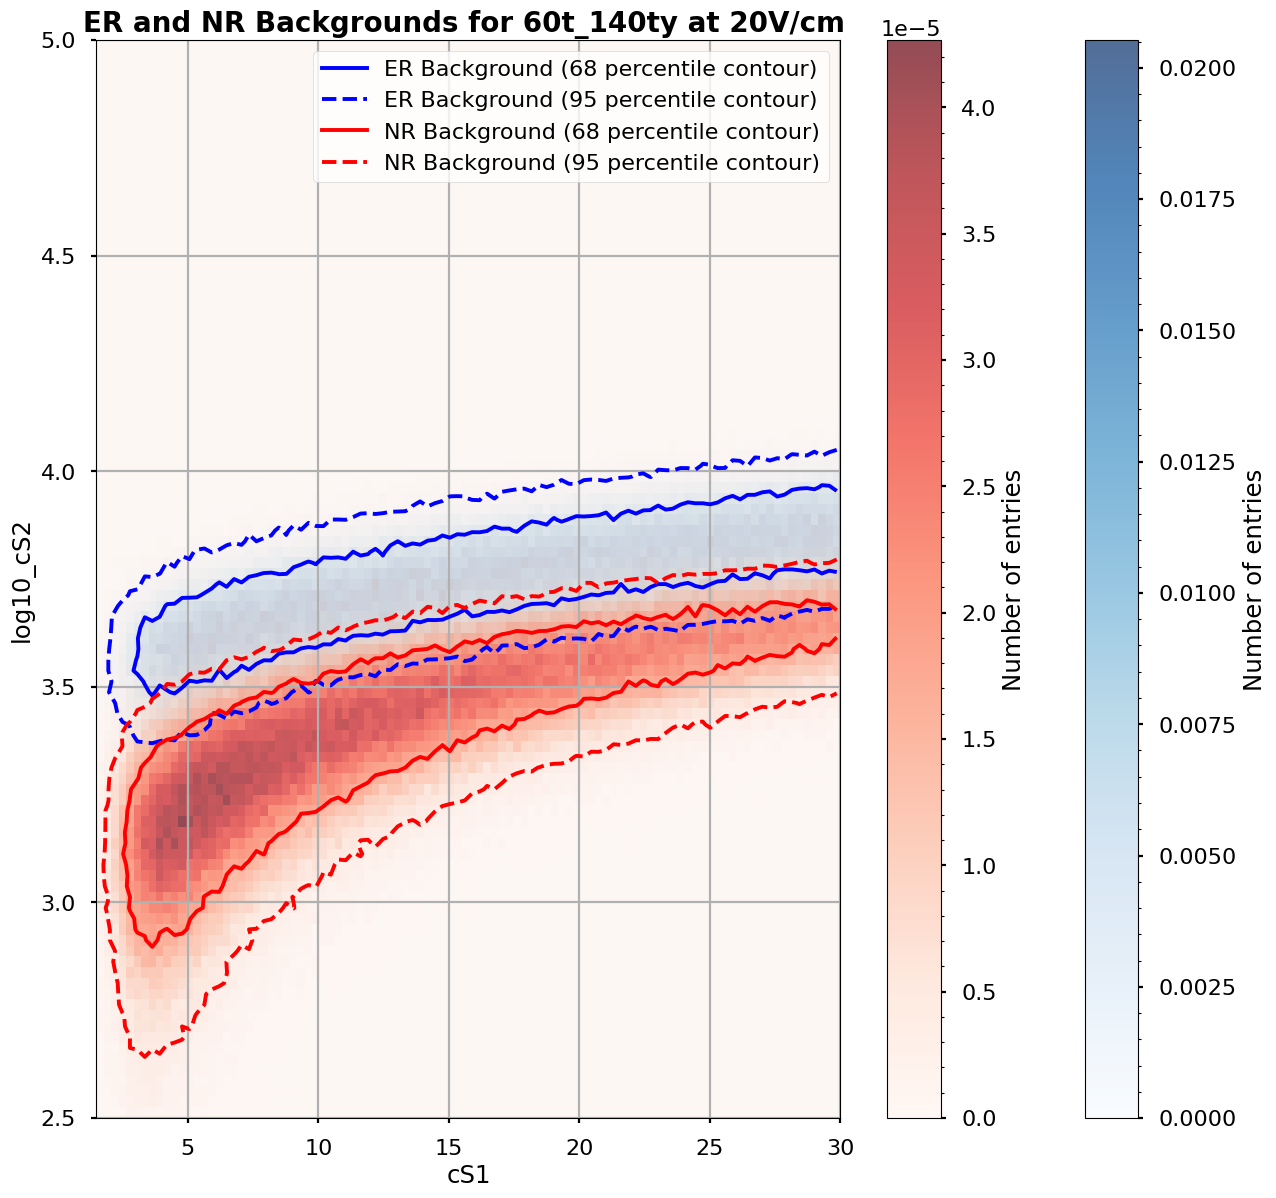

In [306]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 14))
plt.style.use('seaborn-v0_8-poster')

# Plot ER histogram and get legend handles
er_handles = plot_hist_1(ER_hist, color="blue", label="ER Background")
ER_hist.plot(cmap='Blues', alpha=0.7)

# Plot NR histogram and get legend handles
nr_handles = plot_hist_1(NR_hist, color="red", label="NR Background")
NR_hist.plot(cmap='Reds', alpha=0.7)

# Combine legend handles and add a single legend
all_handles = er_handles + nr_handles
plt.legend(handles=all_handles)


plt.title("ER and NR Backgrounds for 60t_140ty at 20V/cm ",fontweight="bold",fontsize=20)
plt.grid()
plt.show()


Visualising the band overlap

/var/folders/11/qrrzf16128s2xj54lz_vslsm0000gn/T/ipykernel_13659/303123270.py:25: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed in 3.10.
  paths = contour.collections[0].get_paths()


ER Leakage: 4.50%
NR Leakage: 4.50%


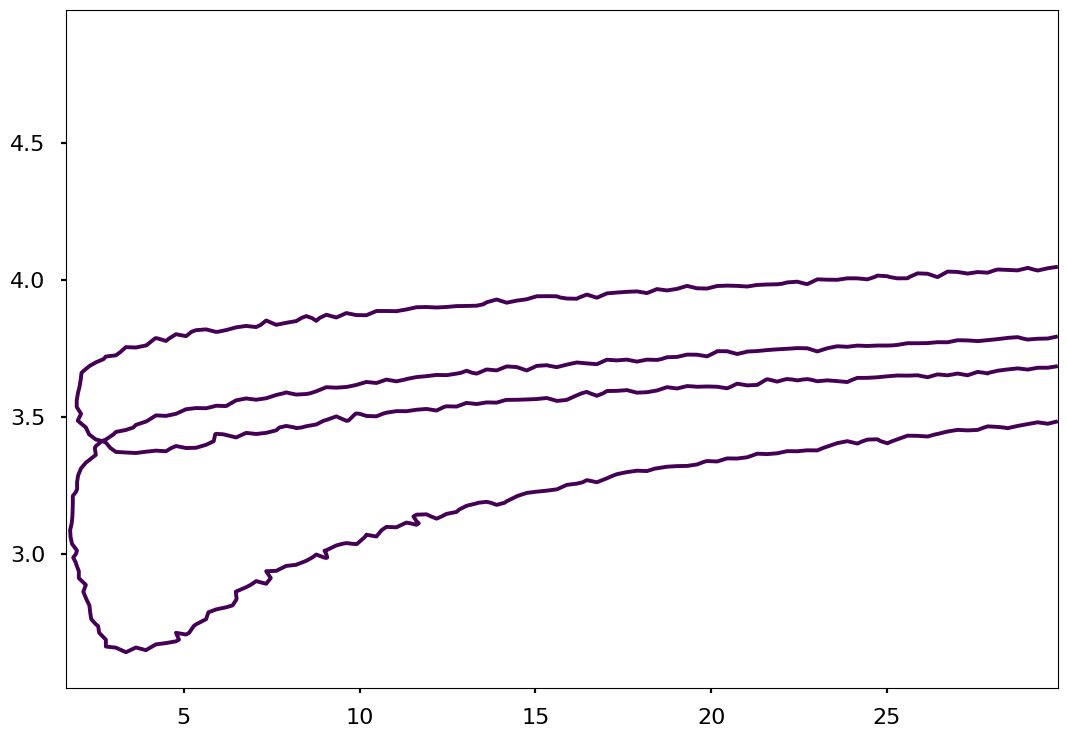

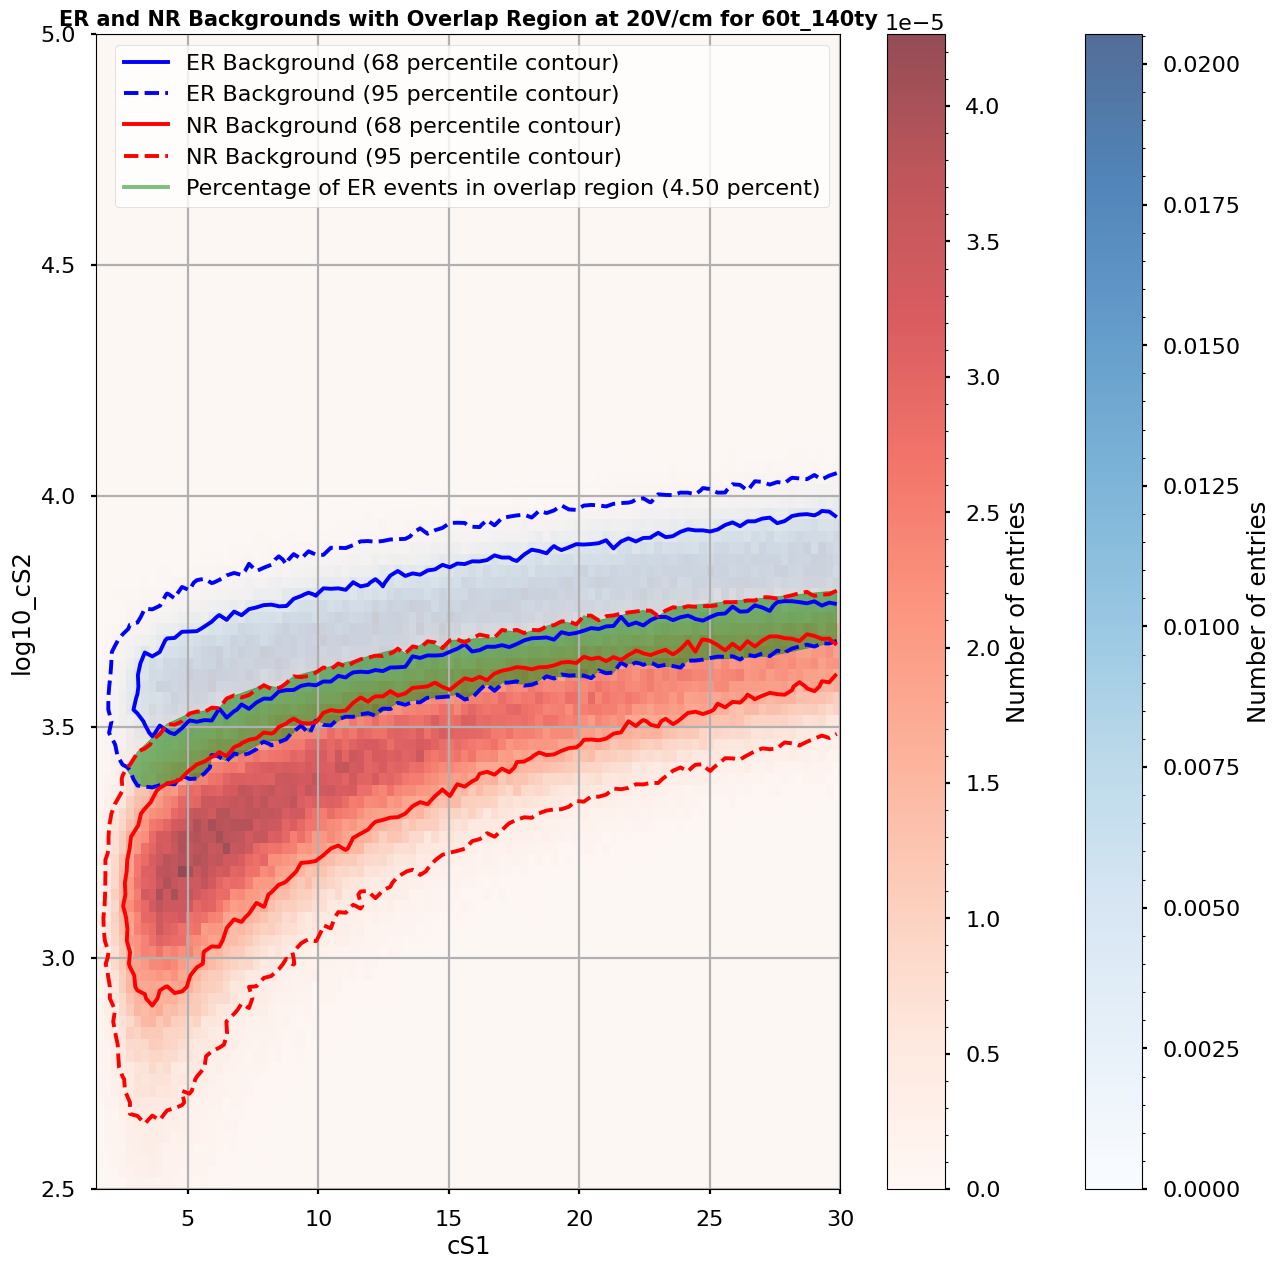

In [307]:
# Example usage (replace ER_hist and NR_hist with your histogram objects)
overlap_region, er_leakage = quantify_overlap(ER_hist, NR_hist)

# Visualization
plt.style.use('seaborn-v0_8-poster')
fig, ax = plt.subplots(figsize=(15, 15))

# Plot ER histogram and get legend handles
er_handles = plot_hist_1(ER_hist, color="blue", label="ER Background")
ER_hist.plot(cmap='Blues', alpha=0.7)

# Plot NR histogram and get legend handles
nr_handles = plot_hist_1(NR_hist, color="red", label="NR Background")
NR_hist.plot(cmap='Reds', alpha=0.7)

# Combine legend handles
all_handles = er_handles + nr_handles

# Plot overlap region
if overlap_region.is_empty:
    print("No overlap found.")
else:
    x, y = overlap_region.exterior.xy
    ax.fill(x, y, color='green', alpha=0.5, 
            label=f"Overlap Region (Events: {er_leakage:.2f})")
    overlap_handle = plt.Line2D([], [], color='green', alpha=0.5, 
                                linestyle='solid', label=f"Percentage of ER events in overlap region ({er_leakage:.2f} percent)")
    all_handles.append(overlap_handle)

# Add the legend to the plot
plt.legend(handles=all_handles)

plt.grid()
plt.title("ER and NR Backgrounds with Overlap Region at 20V/cm for 60t_140ty",fontweight="bold",fontsize=15)
plt.show()


## Signal sources

WIMP

In [ ]:
"""
masses = [9.0, 11.0, 16.0, 19.0, 32.0, 36.0, 40.0, 46.0,
          65.0, 91.0, 129.0, 182.0, 361.0, 508.0, 5000.0, 10000.0]
          """

'\nmasses = [9.0, 11.0, 16.0, 19.0, 32.0, 36.0, 40.0, 46.0,\n          65.0, 91.0, 129.0, 182.0, 361.0, 508.0, 5000.0, 10000.0]\n          '

In [ ]:
'''
for mass in masses:
    WIMP = fd.xlzd.XLZDWIMPSource(wimp_mass=mass, configuration='60t',
                                 drift_field_V_cm=20., gas_field_kV_cm=7.5,
                                 elife_ns=10000e3, g1=0.27)
    
    WIMP_hist = Histdd(bins=100, range=[[cS1_min, cS1_max], [log10_cS2_min, log10_cS2_max]], axis_names=['cS1', 'log10_cS2'])

    WIMP_data = WIMP.simulate(int(1e6))

    WIMP_hist.add(WIMP_data['cs1'], np.log10(WIMP_data['cs2']))

    WIMP_mu = WIMP.estimate_mu(n_trials=int(1e6))
    WIMP_hist.histogram = WIMP_hist.histogram / WIMP_hist.n * WIMP_mu

    plt.figure()
    WIMP_hist.plot()

    pdfs[1][f'WIMP{mass:.0f}'] = WIMP_hist
    
    '''

"\nfor mass in masses:\n    WIMP = fd.xlzd.XLZDWIMPSource(wimp_mass=mass, configuration='80t',\n                                 drift_field_V_cm=80., gas_field_kV_cm=7.5,\n                                 elife_ns=10000e3, g1=0.27)\n    \n    WIMP_hist = Histdd(bins=100, range=[[cS1_min, cS1_max], [log10_cS2_min, log10_cS2_max]], axis_names=['cS1', 'log10_cS2'])\n\n    WIMP_data = WIMP.simulate(int(1e6))\n\n    WIMP_hist.add(WIMP_data['cs1'], np.log10(WIMP_data['cs2']))\n\n    WIMP_mu = WIMP.estimate_mu(n_trials=int(1e6))\n    WIMP_hist.histogram = WIMP_hist.histogram / WIMP_hist.n * WIMP_mu\n\n    plt.figure()\n    WIMP_hist.plot()\n\n    pdfs[1][f'WIMP{mass:.0f}'] = WIMP_hist\n    \n    "

MIGDAL 

/Users/amirr/Desktop/Flame/wimprates/wimprates/__init__.py:6: UserWarning: Default WIMP parameters are changed in accordance with https://arxiv.org/abs/2105.00599 (github.com/JelleAalbers/wimprates/pull/14)
  warnings.warn(
/Users/amirr/Desktop/Flame/wimprates/wimprates/__init__.py:6: UserWarning: Default WIMP parameters are changed in accordance with https://arxiv.org/abs/2105.00599 (github.com/JelleAalbers/wimprates/pull/14)
  warnings.warn(
/Users/amirr/Desktop/Flame/wimprates/wimprates/__init__.py:6: UserWarning: Default WIMP parameters are changed in accordance with https://arxiv.org/abs/2105.00599 (github.com/JelleAalbers/wimprates/pull/14)
  warnings.warn(
/Users/amirr/Desktop/Flame/wimprates/wimprates/__init__.py:6: UserWarning: Default WIMP parameters are changed in accordance with https://arxiv.org/abs/2105.00599 (github.com/JelleAalbers/wimprates/pull/14)
  warnings.warn(
/Users/amirr/Desktop/Flame/wimprates/wimprates/__init__.py:6: UserWarning: Default WIMP parameters are c

------------------------------------------
Migdal ionisation probabilities
P. Cox, M. Dolan, C. McCabe, H. Quiney (2022)
arXiv:2208.12222
------------------------------------------
------------------------------------------
Migdal ionisation probabilities
P. Cox, M. Dolan, C. McCabe, H. Quiney (2022)
arXiv:2208.12222
------------------------------------------------------------------------------------
Migdal ionisation probabilities
P. Cox, M. Dolan, C. McCabe, H. Quiney (2022)
arXiv:2208.12222
------------------------------------------------------------------------------------
Migdal ionisation probabilities
P. Cox, M. Dolan, C. McCabe, H. Quiney (2022)
arXiv:2208.12222
------------------------------------------

------------------------------------------
Migdal ionisation probabilities
P. Cox, M. Dolan, C. McCabe, H. Quiney (2022)
arXiv:2208.12222
------------------------------------------
------------------------------------------
Migdal ionisation probabilities
P. Cox, M. Dolan, C. 

/Users/amirr/Desktop/Flame/flamedisx/flamedisx/source.py:271: UserWarning: Defaults for unused settings ignored: {'configuration': '60t'}
  warnings.warn(f"Defaults for unused settings ignored: {unused}")


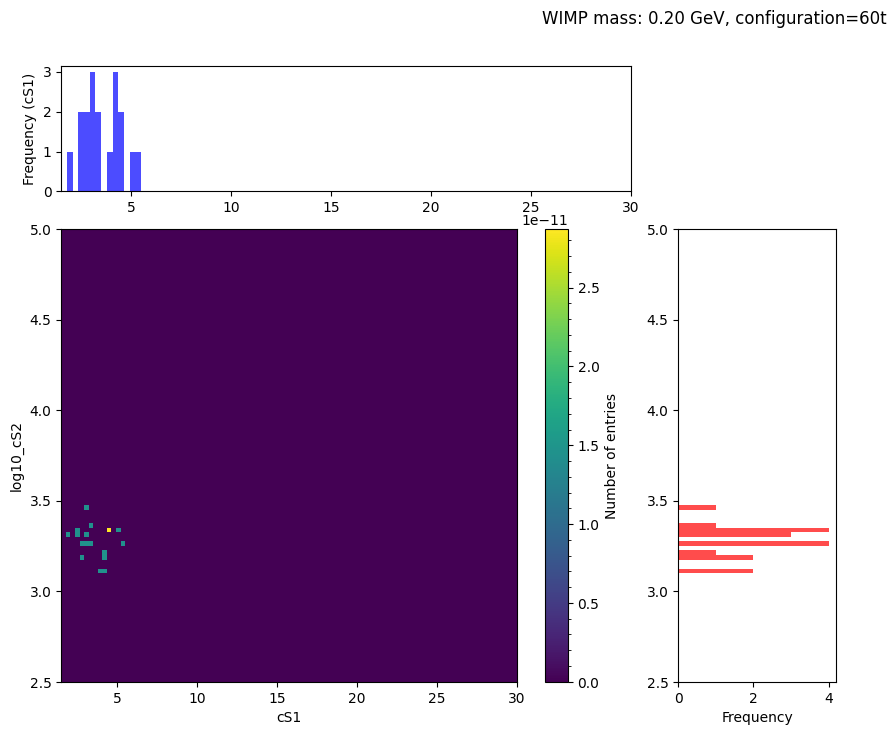

/Users/amirr/Desktop/Flame/wimprates/wimprates/__init__.py:6: UserWarning: Default WIMP parameters are changed in accordance with https://arxiv.org/abs/2105.00599 (github.com/JelleAalbers/wimprates/pull/14)
  warnings.warn(
/Users/amirr/Desktop/Flame/wimprates/wimprates/__init__.py:6: UserWarning: Default WIMP parameters are changed in accordance with https://arxiv.org/abs/2105.00599 (github.com/JelleAalbers/wimprates/pull/14)
  warnings.warn(
/Users/amirr/Desktop/Flame/wimprates/wimprates/__init__.py:6: UserWarning: Default WIMP parameters are changed in accordance with https://arxiv.org/abs/2105.00599 (github.com/JelleAalbers/wimprates/pull/14)
  warnings.warn(
/Users/amirr/Desktop/Flame/wimprates/wimprates/__init__.py:6: UserWarning: Default WIMP parameters are changed in accordance with https://arxiv.org/abs/2105.00599 (github.com/JelleAalbers/wimprates/pull/14)
  warnings.warn(
/Users/amirr/Desktop/Flame/wimprates/wimprates/__init__.py:6: UserWarning: Default WIMP parameters are c

------------------------------------------
Migdal ionisation probabilities
P. Cox, M. Dolan, C. McCabe, H. Quiney (2022)
arXiv:2208.12222
------------------------------------------
------------------------------------------
Migdal ionisation probabilities
P. Cox, M. Dolan, C. McCabe, H. Quiney (2022)
arXiv:2208.12222
------------------------------------------
------------------------------------------
Migdal ionisation probabilities
P. Cox, M. Dolan, C. McCabe, H. Quiney (2022)
arXiv:2208.12222
------------------------------------------
------------------------------------------
Migdal ionisation probabilities
P. Cox, M. Dolan, C. McCabe, H. Quiney (2022)
arXiv:2208.12222
------------------------------------------
------------------------------------------
Migdal ionisation probabilities
P. Cox, M. Dolan, C. McCabe, H. Quiney (2022)
arXiv:2208.12222
------------------------------------------
------------------------------------------
Migdal ionisation probabilities
P. Cox, M. Dolan, C.

/Users/amirr/Desktop/Flame/flamedisx/flamedisx/source.py:271: UserWarning: Defaults for unused settings ignored: {'configuration': '60t'}
  warnings.warn(f"Defaults for unused settings ignored: {unused}")


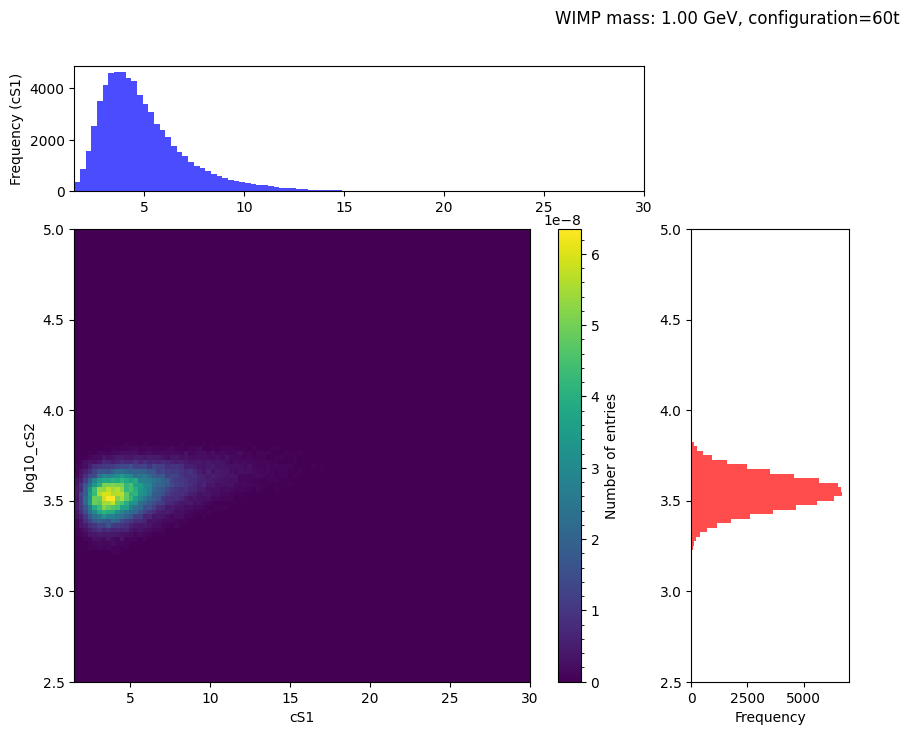

/Users/amirr/Desktop/Flame/wimprates/wimprates/__init__.py:6: UserWarning: Default WIMP parameters are changed in accordance with https://arxiv.org/abs/2105.00599 (github.com/JelleAalbers/wimprates/pull/14)
  warnings.warn(
/Users/amirr/Desktop/Flame/wimprates/wimprates/__init__.py:6: UserWarning: Default WIMP parameters are changed in accordance with https://arxiv.org/abs/2105.00599 (github.com/JelleAalbers/wimprates/pull/14)
  warnings.warn(
/Users/amirr/Desktop/Flame/wimprates/wimprates/__init__.py:6: UserWarning: Default WIMP parameters are changed in accordance with https://arxiv.org/abs/2105.00599 (github.com/JelleAalbers/wimprates/pull/14)
  warnings.warn(
/Users/amirr/Desktop/Flame/wimprates/wimprates/__init__.py:6: UserWarning: Default WIMP parameters are changed in accordance with https://arxiv.org/abs/2105.00599 (github.com/JelleAalbers/wimprates/pull/14)
  warnings.warn(
/Users/amirr/Desktop/Flame/wimprates/wimprates/__init__.py:6: UserWarning: Default WIMP parameters are c

------------------------------------------
Migdal ionisation probabilities
P. Cox, M. Dolan, C. McCabe, H. Quiney (2022)
arXiv:2208.12222
------------------------------------------
------------------------------------------
Migdal ionisation probabilities
P. Cox, M. Dolan, C. McCabe, H. Quiney (2022)
arXiv:2208.12222
------------------------------------------
------------------------------------------
Migdal ionisation probabilities
P. Cox, M. Dolan, C. McCabe, H. Quiney (2022)
arXiv:2208.12222
------------------------------------------
------------------------------------------
Migdal ionisation probabilities
P. Cox, M. Dolan, C. McCabe, H. Quiney (2022)
arXiv:2208.12222
------------------------------------------
------------------------------------------
Migdal ionisation probabilities
P. Cox, M. Dolan, C. McCabe, H. Quiney (2022)
arXiv:2208.12222
------------------------------------------
------------------------------------------
Migdal ionisation probabilities
P. Cox, M. Dolan, C.

/Users/amirr/Desktop/Flame/flamedisx/flamedisx/source.py:271: UserWarning: Defaults for unused settings ignored: {'configuration': '60t'}
  warnings.warn(f"Defaults for unused settings ignored: {unused}")


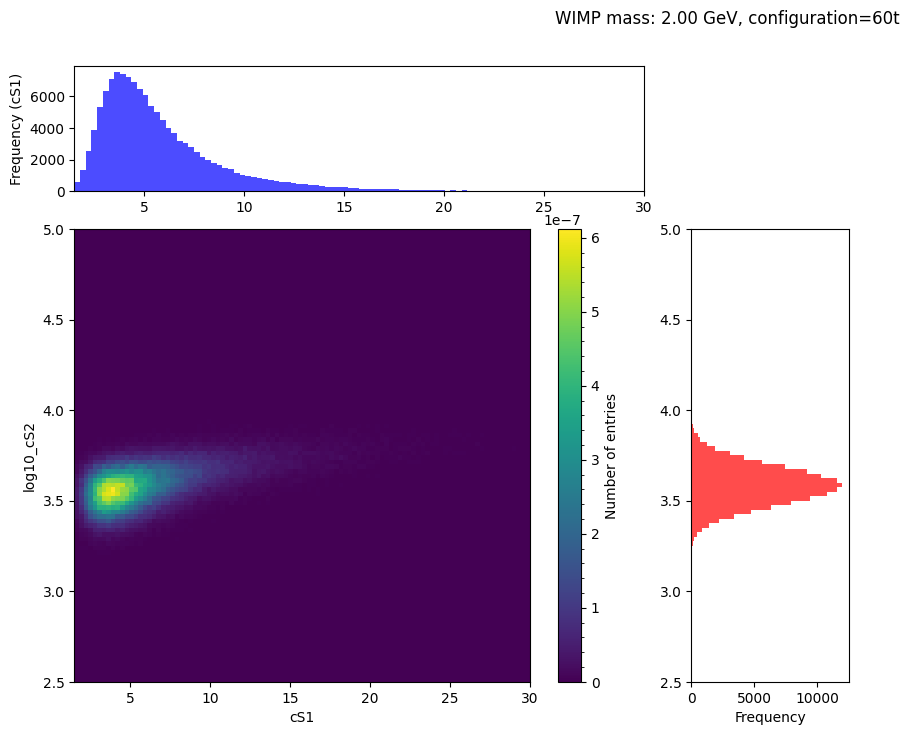

In [43]:
masses = [0.2,1.0,2.0]

#masses = [1.0,2.0,5,10]
# Even 0.15 is giving singular matrix error 
for mass in masses: 
# Create a Migdal source for the given mass
    Migdal = fd.xlzd.XLZDMigdalSource(wimp_mass=mass, configuration='60t',
                                      drift_field_V_cm=20., gas_field_kV_cm=7.5,
                                      elife_ns=10000e3, g1=0.27,modulation=False) # if modulation = True, takes 18 mins per mass !,30 secs faster second time around
    
    # Create a 2D histogram for cS1 and log10(cS2)
    Migdal_hist = Histdd(bins=100, range=[[cS1_min, cS1_max], [log10_cS2_min, log10_cS2_max]], axis_names=['cS1', 'log10_cS2']) # Decreased Detector threshold in XLZD.ini
    
    # Simulate Migdal data (1 million events)
    Migdal_data = Migdal.simulate(int(1e6)) # Simulating a higher number from 1e6 to 1e7
    
    # Add the simulated data to the histogram
    Migdal_hist.add(Migdal_data['cs1'], np.log10(Migdal_data['cs2']))
    
    # Estimate the mean number of events (mu) from the simulation
    Migdal_mu = Migdal.estimate_mu(n_trials=int(1e6)) #Do I need to make any changes here (made one change to 1e7 from 1e6, 1e6 is better ig)
    
    # Normalize the histogram by dividing by the number of events and scaling with mu
    Migdal_hist.histogram = Migdal_hist.histogram / Migdal_hist.n * Migdal_mu
    
   # Set up the figure with gridspec for projections
    fig = plt.figure(figsize=(10, 8))
    gs = gridspec.GridSpec(4, 4, hspace=0.3, wspace=0.3)

    # Main 2D histogram plot
    ax_main = fig.add_subplot(gs[1:4, 0:3])
    Migdal_hist.plot(log_scale=False)  # Plot the 2D histogram
    
    # Add WIMP mass as title at the top-right corner of the plot
    plt.text(0.95, 0.95, f'WIMP mass: {mass:.2f} GeV, configuration=60t', fontsize=12, ha='right', va='top', transform=plt.gcf().transFigure)

    # Projection for cS1 (x-axis) on top
    ax_xproj = fig.add_subplot(gs[0, 0:3], sharex=ax_main)
    ax_xproj.hist(Migdal_data['cs1'], bins=Migdal_hist.bin_edges[0], color='blue', alpha=0.7)
    ax_xproj.set_ylabel('Frequency (cS1)')
    ax_xproj.tick_params(axis='x', labelbottom=True)

    # Projection for log10(cS2) (y-axis) on the right
    ax_yproj = fig.add_subplot(gs[1:4, 3], sharey=ax_main)
    ax_yproj.hist(np.log10(Migdal_data['cs2']), bins=Migdal_hist.bin_edges[1], orientation='horizontal', color='red', alpha=0.7)
    ax_yproj.set_xlabel('Frequency')
    ax_yproj.tick_params(axis='y', labelleft=True)

    # Adjust layout and show plot
    #plt.tight_layout()
    plt.show()
    
    # Store the histogram in the pdfs dictionary

    pdfs[1][f'WIMP0{int(mass * 10):02d}'] = Migdal_hist
    #pdfs[1][f'WIMP{mass:.0f}'] = Migdal_hist




 # Script for density counts v/s energy B+S

In [ ]:
import matplotlib.pyplot as plt

masses = [0.6]

#masses = [1.0,2.0,5,10]
# Even 0.15 is giving singular matrix error 
for mass in masses: 
# Create a Migdal source for the given mass
    Migdal = fd.xlzd.XLZDMigdalSource(wimp_mass=mass, configuration='60t',
                                      drift_field_V_cm=20., gas_field_kV_cm=7.5,
                                      elife_ns=10000e3, g1=0.27,modulation=False) # if modulation = True, takes 18 mins per mass !,30 secs faster second time around
    
    # Create a 2D histogram for cS1 and log10(cS2)
    Migdal_hist = Histdd(bins=100, range=[[cS1_min, cS1_max], [log10_cS2_min, log10_cS2_max]], axis_names=['cS1', 'log10_cS2']) # Decreased Detector threshold in XLZD.ini
    
    # Simulate Migdal data (1 million events)
    Migdal_data_6= Migdal.simulate(int(1e6)) # Simulating a higher number from 1e6 to 1e7

plt.hist(
    Migdal_data_6.ces_er_equivalent,
    bins=100,
    color='green',
    alpha=0.9,
    label="Migdal Data 0.6 GeV/c²",
    weights=np.ones_like(Migdal_data_6.ces_er_equivalent) / 1e6
)

plt.hist(
    SolarER_data.ces_er_equivalent,
    bins=100,
    color='red',
    alpha=0.5,
    label="ER Solar Neutrinos",
    weights=np.ones_like(SolarER_data.ces_er_equivalent) / 1e6
)


plt.xlabel("Energy (KeV)")
plt.ylabel("Density")
plt.title("Counts Density v/s Energy")
plt.legend()
plt.grid()
plt.show()


print("Migdal Histogram Count:", Migdal_hist.n)


# Counts/ty

In [32]:
print("SolarER Histogram Count:", SolarER_hist.n)
print("Pb214 Histogram Count:", Pb214_hist.n)
print("Kr85 Histogram Count:", Kr85_hist.n)
print("CEvNS_other Histogram Count:", CEvNS_other_hist.n)
print("Xe136 Histogram Count:", Xe136_hist.n)
print("AC Histogram Count:", AC_temp.n)


SolarER Histogram Count: 8.027672315658569
Pb214 Histogram Count: 1.202454545431137
Kr85 Histogram Count: 4.931749290405273
CEvNS_other Histogram Count: 0.034351430519923565
Xe136 Histogram Count: 2.336299883102417
AC Histogram Count: 0.9999999999999999


## Save all PDFs

In [25]:
if not os.path.exists('PDFs'):
    os.makedirs('PDFs')

In [26]:
pkl.dump(pdfs, open('PDFs/pdfs_mig_SI_60t_0.2-2.0Gev_test_AC.pkl', 'wb'))